# Extraindo as Letras da Discografia de Perrie Edwards
Perrie Louise Edwards é uma cantora e compositora britânica. Ela é mais conhecida por ser integrante do grupo feminino Little Mix, um dos grupos femininos mais bem-sucedidos de todos os tempos. Edwards se estabeleceu como uma das maiores vocalistas de sua geração. Perrie deu início à carreira após participar da oitava temporada do talent show The X Factor no canal de televisão ITV.

Com o grupo a cantora venceu três Brit Awards com o primeiro sendo Melhor Música Britânica em 2017, Melhor Vídeo Britânico com Woman Like Me em 2018, sendo terceiro o prêmio de Melhor Grupo Britânico - fazendo história na premiação tornando-se o primeiro grupo feminino a conseguir tal feito em mais de 43 anos da cerimônia.

A cantora em junto do grupo conseguiu uma fortuna de aproximadamente £66,7 milhões de libras esterlinas e ficaram na lista entre as maiores celebridades mais bem pagas de seu país e segundo a revista inglesa Debrette elas se tornaram uma das personalidades de maior influência no Reino Unido. Edwards vendeu mais de 72 milhões de discos com o grupo, tornando-se um dos grupos femininos que mais vendeu à nível global. Como compositora contribuiu com músicas para os álbuns do Little Mix desde o início. Edwards é a primeira embaixadora feminina da marca "Supreme Nutrition" e em 2021 ela lançou sua marca de moda chamada Disora.

Mais informações no link: https://pt.wikipedia.org/wiki/Perrie_Edwards

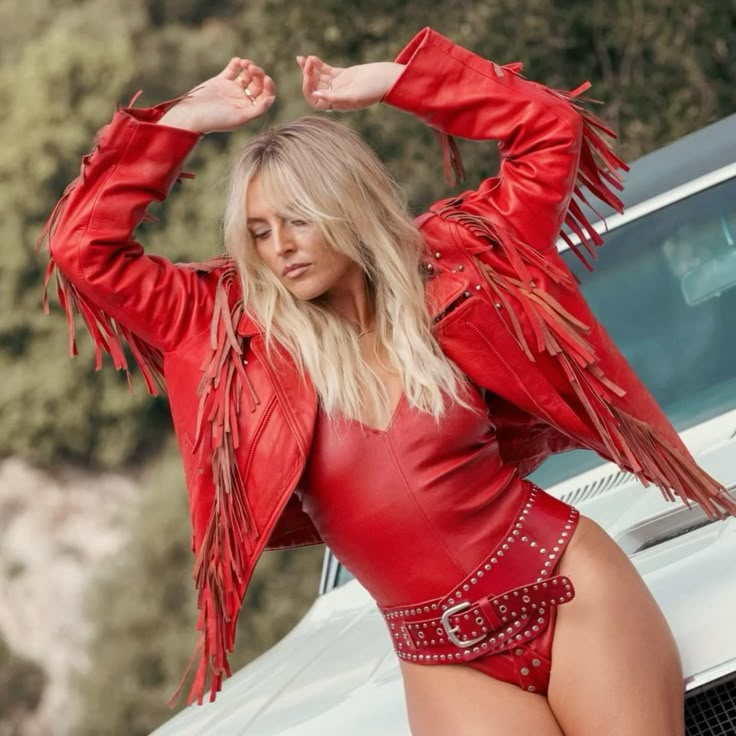

## API LyricsGenius
A API LyricsGenius é uma poderosa ferramenta que permite acessar uma vasta coleção de letras de músicas e informações sobre artistas. Desenvolvida pela Genius, uma plataforma conhecida por sua base de dados de letras e anotações, a API oferece funcionalidades que facilitam a busca por letras, detalhes de álbuns, informações sobre colaboradores e muito mais. Com suporte a consultas por nome de artista, título da música ou até mesmo trechos de letras, a API é especialmente útil para desenvolvedores que desejam integrar dados musicais em aplicativos e sites. Além disso, a API fornece recursos para obter anotações e interpretações das letras, enriquecendo a experiência do usuário ao explorar o significado das músicas. Através da LyricsGenius API, os amantes da música e os desenvolvedores podem aprofundar sua compreensão sobre as canções e seus criadores, trazendo um novo nível de interação com a música.

Mais informações e a documentação de como usar a API no link: https://docs.genius.com/

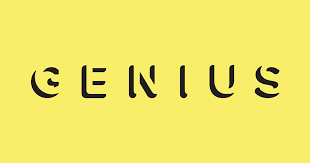

In [ ]:
# Importando as bibliotecas
import os
import pandas as pd
import requests
import lyricsgenius
import csv

# Chamada de Requisição
api_key = "rkmYPIURaV9uyAXm8OhBNkDG_bGgeYFP_UDFfasHS0b_sxPWz2PrBJR8Rmcdzhhr"
genius = lyricsgenius.Genius(api_key)

# Busca do artista na API
# Limitando para 5 músicas pois a discografia oficial é somente essa quantidade de músicas
artist = genius.search_artist("Perrie", max_songs=5)

Searching for songs by Perrie...

Song 1: "Forget About Us"
Song 2: "You Go Your Way"
Song 3: "Tears"
Song 4: "Me, Myself & You"
Song 5: "Rollercoaster"

Reached user-specified song limit (5).
Done. Found 5 songs.


In [ ]:
# Importando para um arquivo json
artist.save_lyrics()

Wrote Lyrics_Perrie.json.


In [ ]:
# Acessando as chaves principais dos dados contidos no arquivo JSON
data = json.load(open("Lyrics_Perrie.json", "r"))
data.keys()

dict_keys(['alternate_names', 'api_path', 'description', 'facebook_name', 'header_image_url', 'id', 'image_url', 'instagram_name', 'is_meme_verified', 'is_verified', 'name', 'translation_artist', 'twitter_name', 'url', 'current_user_metadata', 'followers_count', 'description_annotation', 'user', 'songs'])

In [ ]:
# Carregando dados em um dataframe e examinando os dados dentro de 'songs'
df = pd.DataFrame(data['songs'])
df.keys()

Index(['annotation_count', 'api_path', 'artist_names', 'full_title',
       'header_image_thumbnail_url', 'header_image_url', 'id',
       'lyrics_owner_id', 'lyrics_state', 'path', 'primary_artist_names',
       'pyongs_count', 'relationships_index_url', 'release_date_components',
       'release_date_for_display',
       'release_date_with_abbreviated_month_for_display',
       'song_art_image_thumbnail_url', 'song_art_image_url', 'stats', 'title',
       'title_with_featured', 'url', 'featured_artists', 'primary_artist',
       'primary_artists', 'apple_music_id', 'apple_music_player_url',
       'description', 'embed_content', 'featured_video', 'language',
       'recording_location', 'release_date', 'current_user_metadata',
       'song_art_primary_color', 'song_art_secondary_color',
       'song_art_text_color', 'album', 'custom_performances',
       'description_annotation', 'lyrics_marked_complete_by',
       'lyrics_marked_staff_approved_by', 'media', 'producer_artists',
     

In [ ]:
# Selecionando os dados úteis em um novo dataframe
df_oficial = df[['title', 'lyrics', 'release_date']].copy()

# Reseta o índice, se necessário
df_oficial.reset_index(drop=True, inplace=True)

# Convertendo a coluna 'release_date' para o formato de data
df_oficial['release_date'] = pd.to_datetime(df_oficial['release_date'], errors='coerce')

# Extraindo apenas o ano da coluna 'release_date' para armazenar na 'release_year'
df_oficial['release_year'] = df_oficial['release_date'].dt.year

# Exibindo o dataframe resultante
df_oficial

,title,lyrics,release_date,release_year
0,Forget About Us,[Intro]\nI don't want you ever to forget about...,2024-04-12,2024
1,You Go Your Way,"[Intro]\nYou go your way, I'll go mine\nOkay, ...",2024-10-04,2024
2,Tears,[Intro]\n(I know I'm never gettin' back all my...,2024-06-21,2024
3,"Me, Myself & You",[Verse 1]\nYou're the darkest part of me\nThe ...,2024-11-08,2024
4,Rollercoaster,[Intro]\nEverybody loves\nI'll take the highs ...,2025-02-14,2025


In [ ]:
import nltk
from nltk.corpus import stopwords
import re

# Define uma função para remover stopwords de um texto
def remove_stopwords(text):
    # Separa o texto em uma lista de palavras
    text = text.split(' ')
    # Filtra a lista, mantendo apenas as palavras que não estão na lista de stopwords em inglês
    text = [x for x in text if x not in stopwords.words('english')]
    # Junta a lista de palavras filtradas em uma única string e a retorna
    return ' '.join(text)

# Aplica a função de remoção de stopwords em cada linha da coluna 'lyrics' do dataframe
df_oficial.loc[:, 'lyrics'] = df_oficial.loc[:, 'lyrics'].apply(lambda x: remove_stopwords(x))

# Define uma função para remover pontuação do texto
def remove_ponctuation(text):
    # Usa uma expressão regular para manter apenas letras (maiúsculas e minúsculas) e junta as palavras em uma string
    return " ".join(re.findall("[a-zA-Z]+", text))

# Aplica a função de remoção de pontuação em cada linha da coluna 'lyrics' do dataframe
df_oficial.loc[:, 'lyrics'] = df_oficial.loc[:, 'lyrics'].apply(lambda x: remove_ponctuation(x))

# Define uma função para remover palavras com menos de 3 caracteres do texto
def remove_words_with_less_3(text):
    # Separa o texto em uma lista de palavras
    text = text.split(' ')
    # Filtra a lista, mantendo apenas as palavras com mais de 3 caracteres
    text = [x for x in text if len(x) > 3]
    # Junta a lista de palavras filtradas em uma única string e a retorna
    return ' '.join(text)

# Aplica a função de remoção de palavras curtas em cada linha da coluna 'lyrics' do dataframe
df_oficial.loc[:, 'lyrics'] = df_oficial.loc[:, 'lyrics'].apply(lambda x: remove_words_with_less_3(x))

# Converte todo o texto em letras minúsculas em cada linha da coluna 'lyrics' do dataframe
df_oficial.loc[:, 'lyrics'] = df_oficial.loc[:, 'lyrics'].apply(lambda x: x.lower())

# Cria uma nova coluna 'Word Count' no dataframe que conta o número de palavras em cada linha da coluna 'lyrics'
df_oficial['Word Count'] = df_oficial['lyrics'].apply(lambda x: len(x.split(' ')))

# Função para remover as palavras indesejadas
def remove_unwanted_words(text):
    words_to_remove = ["embed", "intro", "verse", "chorus", "outro", "instrumental"]
    pattern = r'\b(?:' + '|'.join(words_to_remove) + r')\b'
    return re.sub(pattern, '', text, flags=re.IGNORECASE)

# Aplicar a função na coluna de letras
df_oficial["lyrics"] = df_oficial["lyrics"].apply(remove_unwanted_words)

# Salvar o CSV atualizado
df_oficial.to_csv("PerrieLyrics.csv", index=False)

In [ ]:
import sqlite3

# Criando um banco de dados de teste
conn = sqlite3.connect('Perrie.db')

# Salvando no banco de dados
df_oficial.to_sql('lyrics', conn, index=False)

# Verificando se os dados estão presentes no banco de dados
c = conn.cursor()
c.execute('''
SELECT * FROM LYRICS
          ''')
# Visualização do Banco de Dados gerado
c.fetchall()

[('Forget About Us',
  ' want ever forget forget  heard fell love somebody know heard found someone blew proud wanna hear songs more yeah  remember fell like everything froze glance then from heaven nothin feels like hell well here truth  want ever forget front seat listenin songs made think bonfire smoke hoodie stole flat never gave back post  want ever forget forget  felt love since sure wanna back hear name still ever feel yeah  remember fell like everything froze glance then from heaven nothin feels like hell well here truth  want ever forget front seat listenin songs made think bonfire smoke hoodie stole flat never gave back want ever forget know never perfect think life never yeah found different love movin leave buried post  want ever forget forget forget want ever forget forget yeah bridge remember fell like everything froze glance then from heaven nothin feels like hell well here truth  want ever forget front seat listenin songs made think bonfire smoke hoodie stole flat never